<a href="https://colab.research.google.com/github/AditiSingh006/linear_regression/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install opendatasets
!pip install pandas

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import opendatasets as od

In [7]:
od.download('https://www.kaggle.com/datasets/raphaelmanayon/temperature-and-ice-cream-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aditisingh06
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/raphaelmanayon/temperature-and-ice-cream-sales


100%|██████████| 1.47k/1.47k [00:00<00:00, 1.60MB/s]

In [9]:
ice_cream = pd.read_csv('/content/temperature-and-ice-cream-sales/Ice Cream Sales - temperatures.csv')
ice_cream

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
...,...,...
360,99,85.13
361,99,87.08
362,99,89.29
363,101,81.91


In [10]:
x = ice_cream["Temperature"].values.reshape(-1,1)
y = ice_cream["Ice Cream Profits"].values.reshape(-1,1)

In [12]:
x.shape, y.shape

((365, 1), (365, 1))

Text(0.5, 0, 'Ice cream Profit')

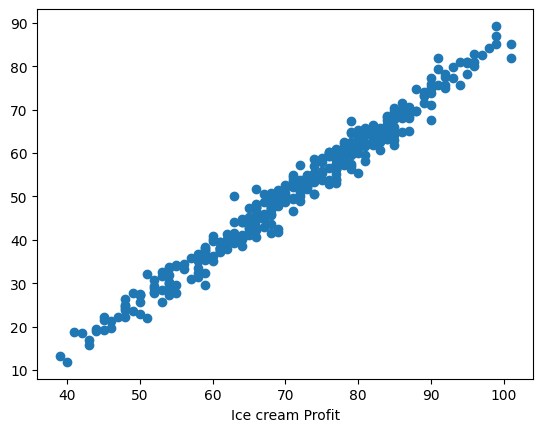

In [15]:
plt.scatter(x,y)
plt.xlabel("Temperature")
plt.xlabel("Ice cream Profit")

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape[0]/365, x_test.shape[0]/365

(0.8, 0.2)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
model.score(x_test,y_test)

0.9836178994668145

In [31]:
temp = np.array([row[0] for row in x]).reshape(-1, 1)
x_min = np.array([[temp.min()]])
x_max = np.array([[temp.max()]])
x_min, x_max

(array([[39]]), array([[101]]))

In [32]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)
y_min, x_min

(array([[12.75520838]]), array([[39]]))

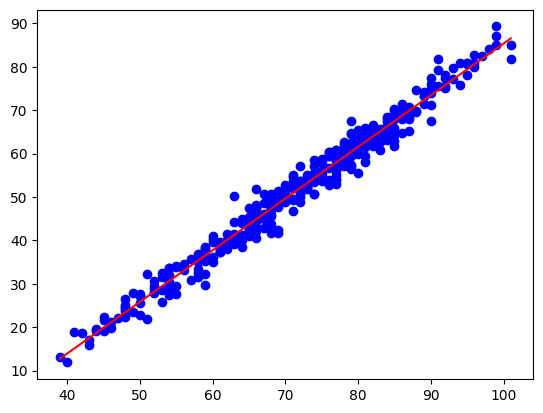

In [34]:
plt.scatter(temp, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')